In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd

In [2]:
# Perform some basic preprocessing during dataframe retrieval
#  - screen out any duplication
#  - no other preprocessing

df_original = vv.quick_data(no_cuts=True, numeric_values_only=False, nans_forbidden=False, remove_duplicates=True, publish=True)

print(df_original.shape)
df_original.head()

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:58: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(vv.LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 21347/30696/24750/24855 ==> 21347/21232/21023/21029
20963
==> 20963
dataframe length: 20963
(20963, 145)


,Description,Price,add_info,distance_to_any_train,type,bedrooms,bathrooms,size,other_key_info,bullet_points,...,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.selectedCurrency,analyticsProperty.selectedPrice,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,Unnamed: 46,borough_name,floorplan_count
ids,,,,,,,,,,,,,,,,,,,,,
124059707,3 bedroom flat for sale,325000.0,"Added on 18/06/2022 by haart, Barkingside",0.5,Flat,3.0,1.0,NaN,NaN,2-3 Bedrooms;First Floor Flat;Well Presented T...,...,Flats / Apartments,False,NaN,NaN,False,No Video,Current,NaN,Redbridge,4.0
121351517,2 bedroom apartment for sale,224995.0,"Reduced on 29/04/2022 by Homechoice, Ilford",0.1,Apartment,2.0,1.0,NaN,NaN,CASH BUYERS ONLY;63 YEARS LEASE;FREE OFF STREE...,...,Flats / Apartments,False,NaN,NaN,False,No Video,Current,NaN,Redbridge,4.0
115934666,1 bedroom ground floor flat for sale,225000.0,"Reduced on 11/02/2022 by Real Move Estates, Ch...",0.9,Ground Flat,1.0,1.0,NaN,NaN,LARGE 1 BEDROOM FLAT;LOCATED ON THE GROUND FLO...,...,Flats / Apartments,False,NaN,NaN,False,No Video,Current,NaN,Redbridge,4.0
124056446,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.1,Flat,1.0,1.0,NaN,NaN,Great Condition;Perfect for a FTB;Close to Exc...,...,Flats / Apartments,False,NaN,NaN,True,No Video,Current,NaN,Redbridge,1.0
85498380,1 bedroom flat for sale,225000.0,"Added on 08/06/2022 by DABORACONWAY, Wanstead ...",0.5,Flat,1.0,1.0,NaN,NaN,NaN,...,Flats / Apartments,False,NaN,NaN,False,No Video,Current,NaN,Redbridge,4.0


In [3]:
columns = df_original.columns
i = -1
import matplotlib.pyplot as plt

columns

Index(['Description', 'Price', 'add_info', 'distance_to_any_train', 'type',
       'bedrooms', 'bathrooms', 'size', 'other_key_info', 'bullet_points',
       ...
       'analyticsProperty.propertyType', 'analyticsProperty.retirement',
       'analyticsProperty.selectedCurrency', 'analyticsProperty.selectedPrice',
       'analyticsProperty.soldSTC', 'analyticsProperty.videoProvider',
       'analyticsProperty.viewType', 'Unnamed: 46', 'borough_name',
       'floorplan_count'],
      dtype='object', length=145)

In [4]:
i = -1


def next_histogram():
    global i

    values = len(df_original[columns[i]].unique())

    skipped = []
    while values < 3 or values > 50:  #if values <= 150:
        skipped.append(columns[i] + "(" + str(values)+ ")")
        i = i + 1
        values = len(df_original[columns[i]].unique())

    if skipped:
        print(f'skipping {"/".join(skipped)}: too many value types or not enough value types')
        print()

    print(i, columns[i], df_original[columns[i]].dtype, values)

    try:
        #df_original[columns[i]].hist(figsize=(20, 8), bins=20)
        df_original[columns[i]].hist(figsize=(20, 8))
        if values > 15:
            plt.xticks(rotation=45)
        plt.show()
    except:
        print("failed to load graph")

skipping Description(124)/Price(1082)/add_info(16745): too many value types or not enough value types

3 distance_to_any_train float64 43


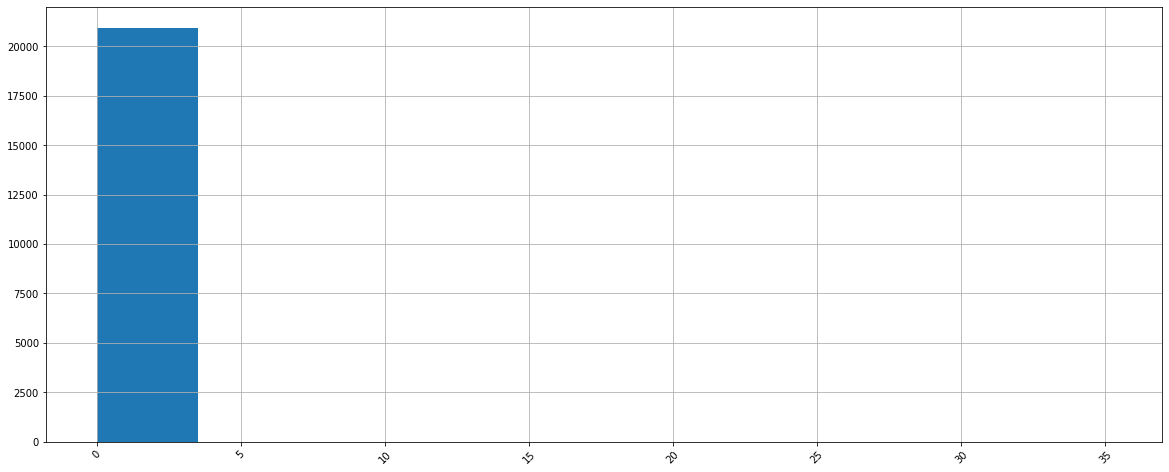

In [5]:
i = (i + 1) % len(columns)
next_histogram()

4 type object 39


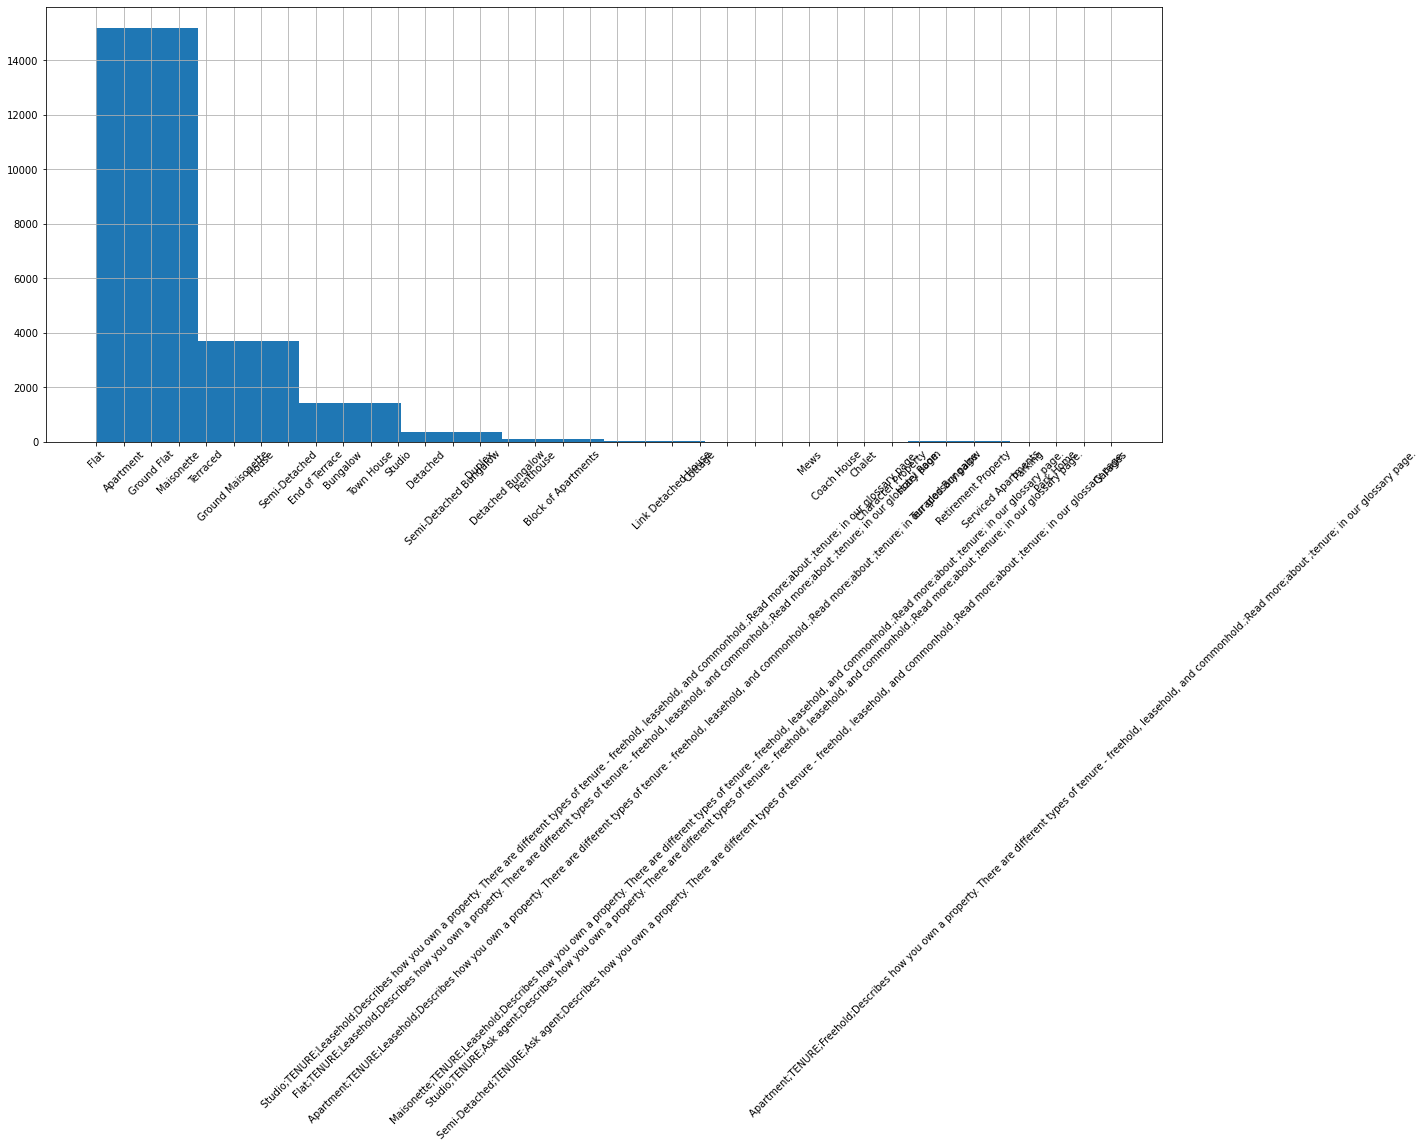

In [6]:
i = (i + 1) % len(columns)
next_histogram()

5 bedrooms float64 10


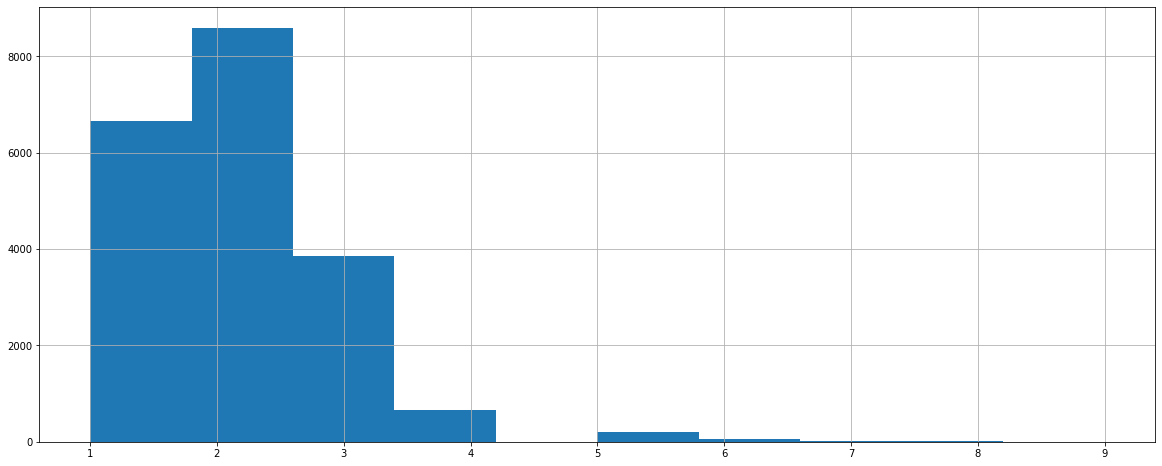

In [7]:
i = (i + 1) % len(columns)
next_histogram()

6 bathrooms float64 11


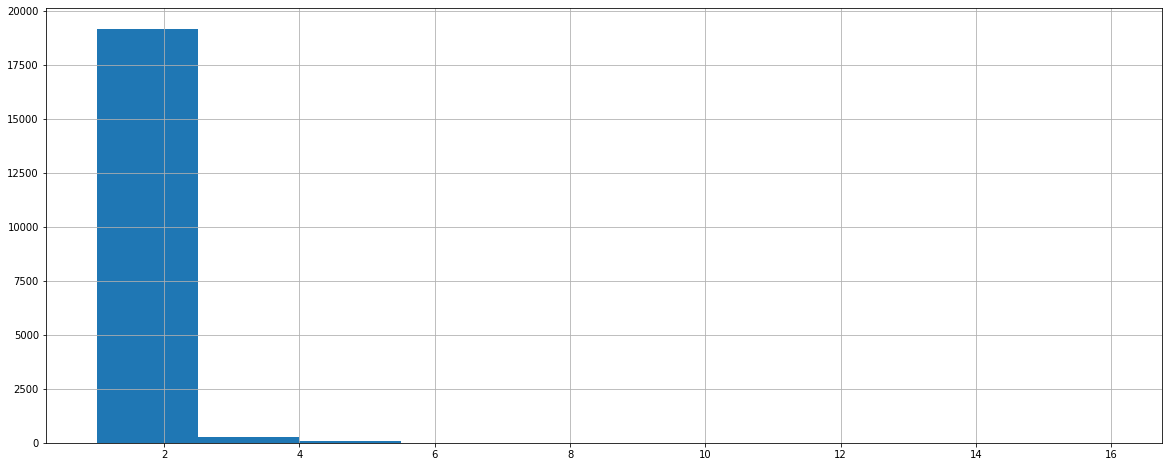

In [8]:
i = (i + 1) % len(columns)
next_histogram()

skipping size(1243)/other_key_info(2)/bullet_points(18454)/station_info(12237): too many value types or not enough value types

11 hold_type object 4


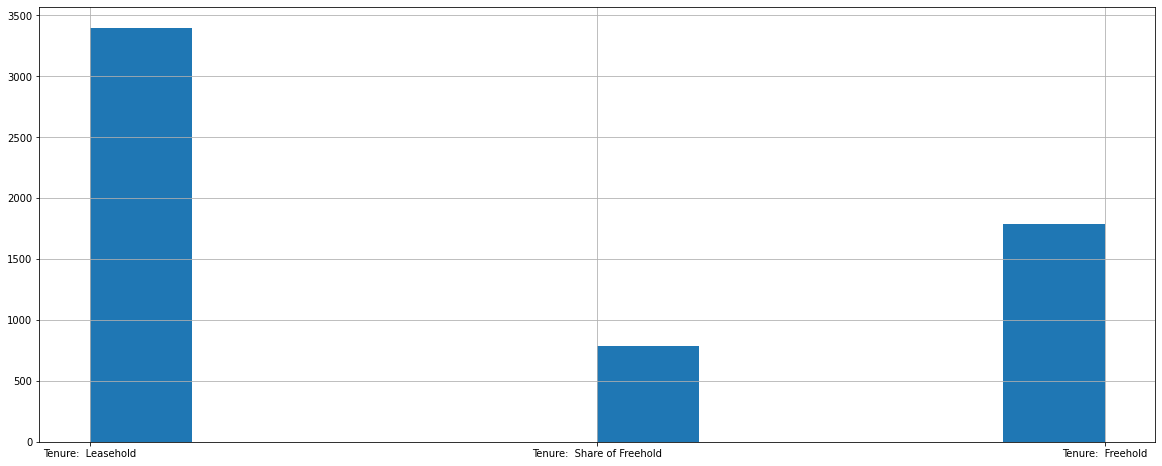

In [9]:
i = (i + 1) % len(columns)
next_histogram()

skipping short_description(1117)/long_description(20749)/date_scraped_listing(20829)/keyFeatures(18421)/images(20941)/virtualTours(5268)/industryAffiliations(55)/rooms(2359)/nearestAirports(2)/nearestStations(18686)/showSchoolInfo(2)/countryGuide(1): too many value types or not enough value types

24 channel object 3


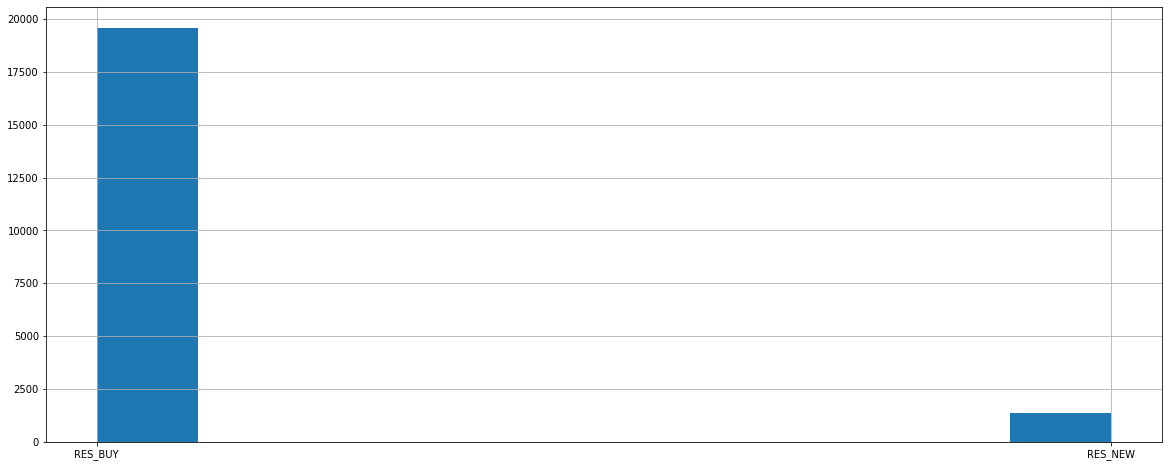

In [10]:
i = (i + 1) % len(columns)
next_histogram()

skipping sizings(2976)/brochures(14913)/epcGraphs(14968): too many value types or not enough value types

28 bedrooms_model float64 10


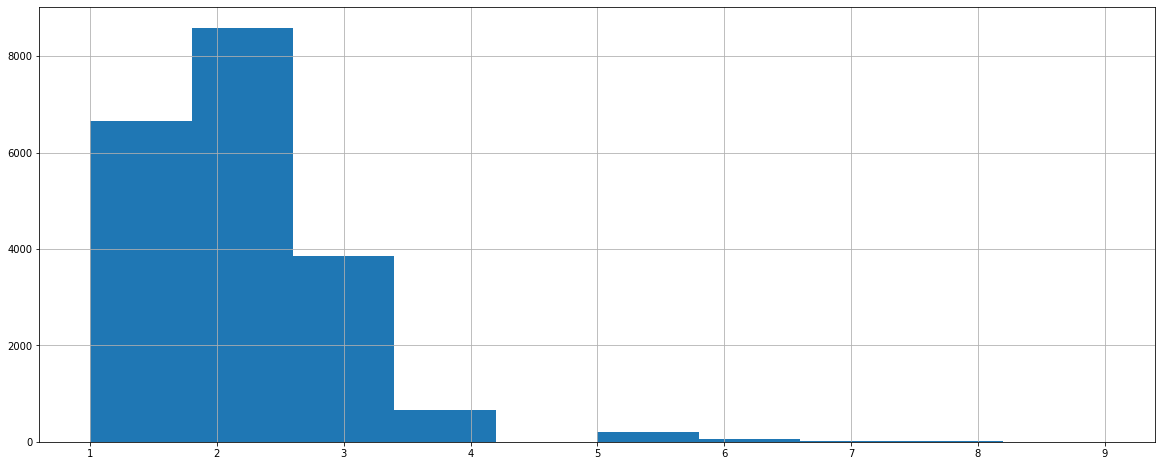

In [11]:
i = (i + 1) % len(columns)
next_histogram()

29 bathrooms_model float64 11


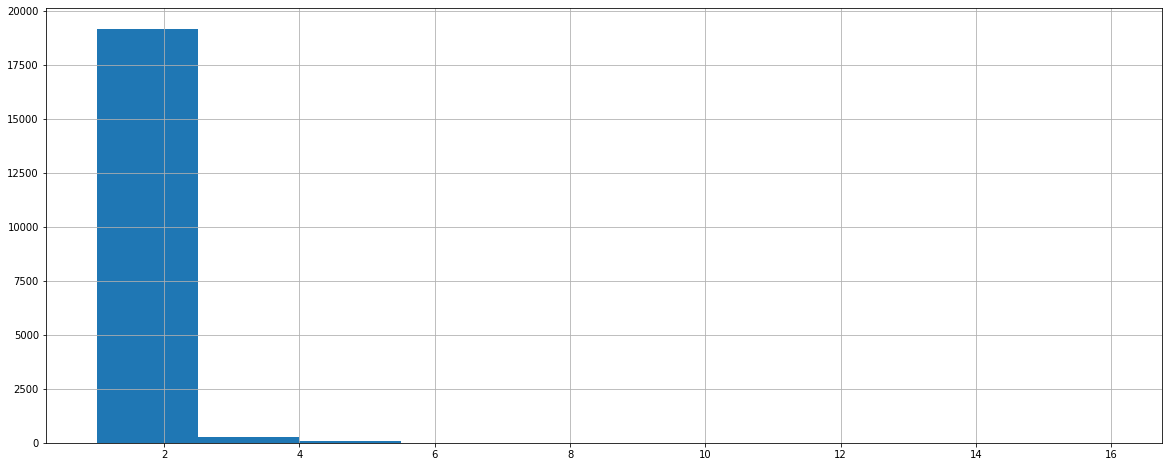

In [12]:
i = (i + 1) % len(columns)
next_histogram()

skipping transactionType(2): too many value types or not enough value types

31 tags object 17


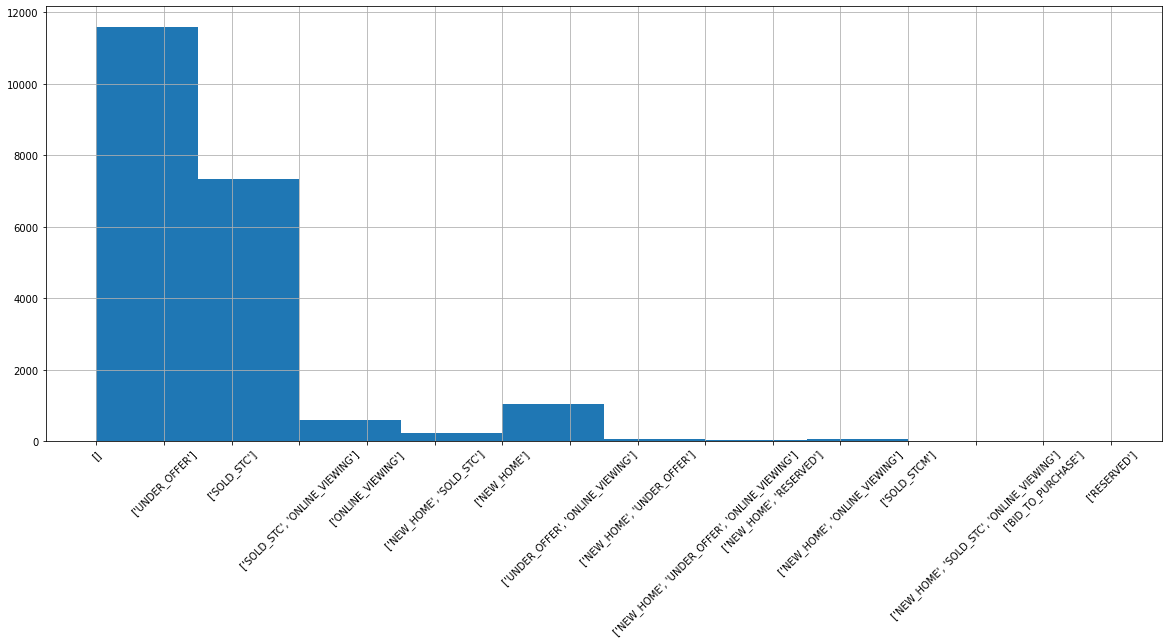

In [13]:
i = (i + 1) % len(columns)
next_histogram()

skipping feesApply(1)/lettings(1)/infoReelItems(2664): too many value types or not enough value types

35 soldPropertyType object 6


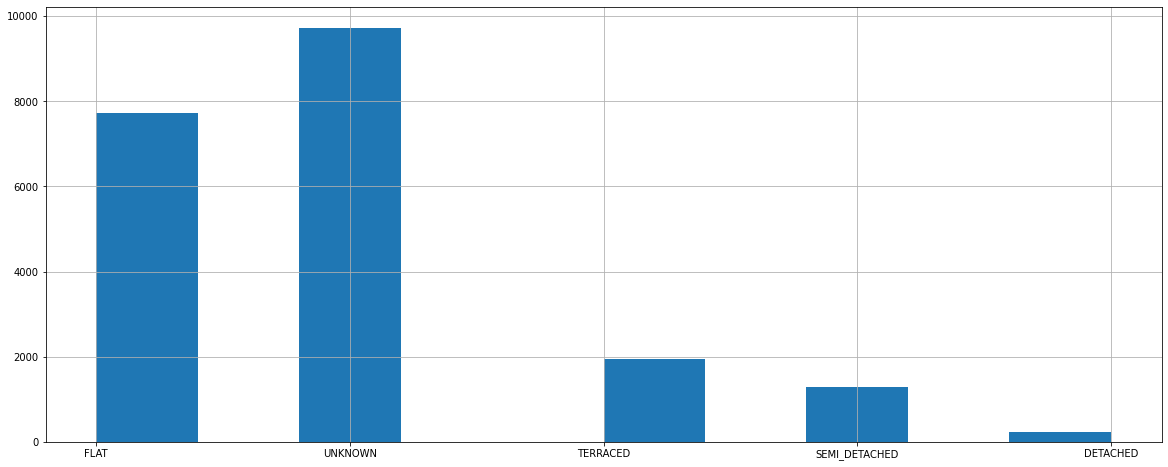

In [14]:
i = (i + 1) % len(columns)
next_histogram()

skipping auctionProvider(1): too many value types or not enough value types

37 propertySubType object 33


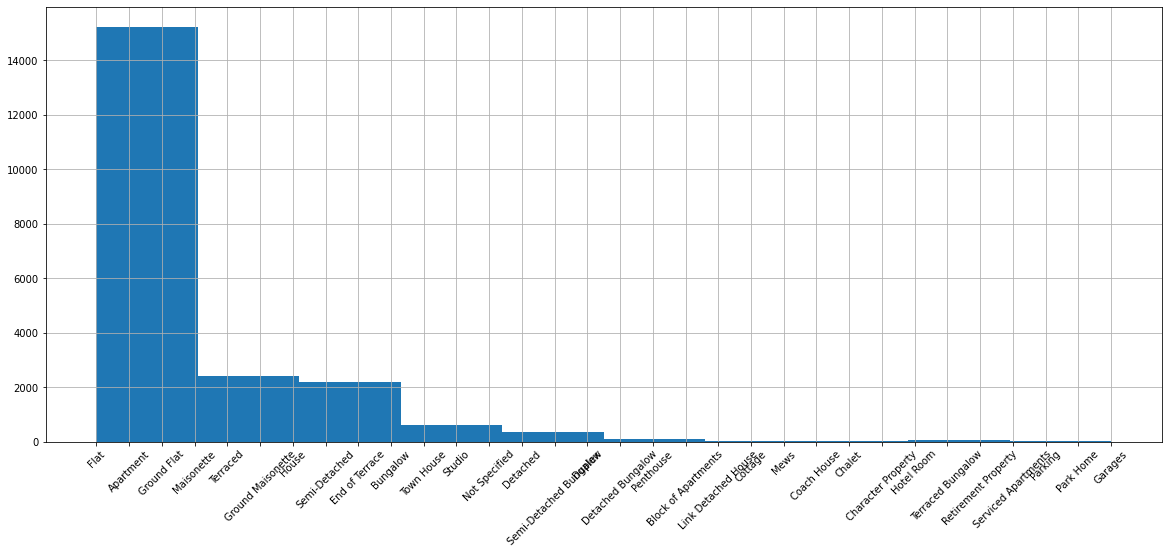

In [15]:
i = (i + 1) % len(columns)
next_histogram()

skipping businessForSale(2)/commercial(2)/commercialUseClasses(2)/affordableBuyingScheme(1): too many value types or not enough value types

42 status.published object 3
failed to load graph


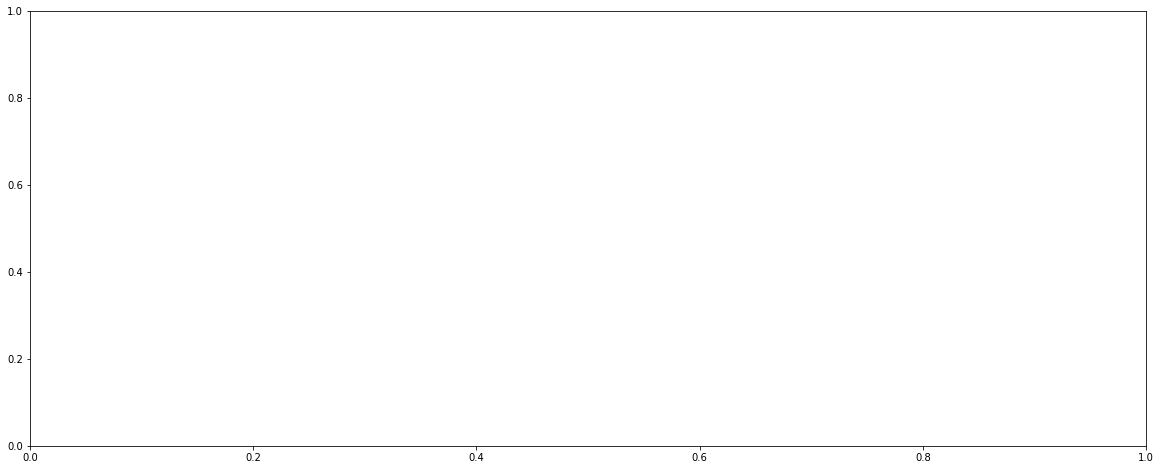

In [16]:
i = (i + 1) % len(columns)
next_histogram()

43 status.archived object 3
failed to load graph


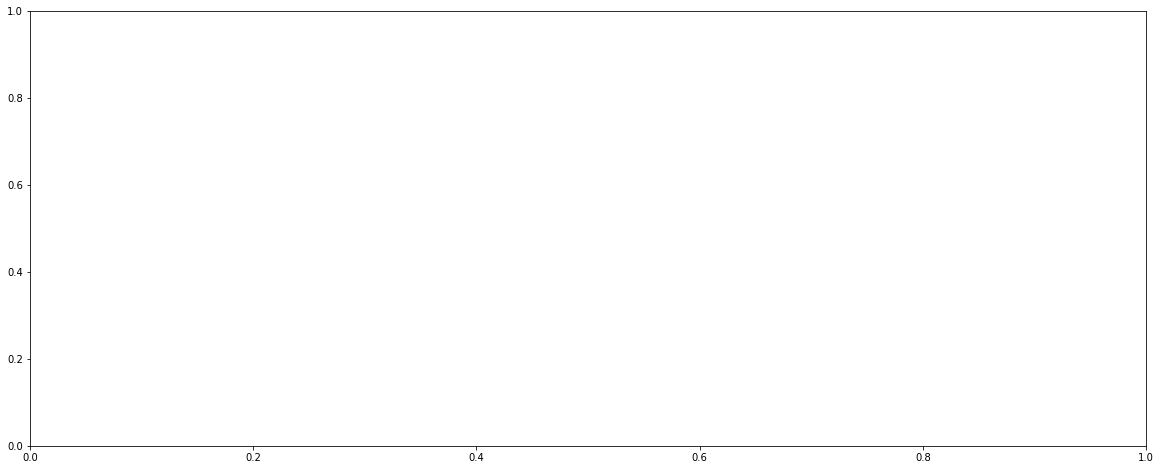

In [17]:
i = (i + 1) % len(columns)
next_histogram()

skipping text.description(20715)/text.propertyPhrase(125)/text.shareText(125)/text.shareDescription(20643)/text.pageTitle(18456)/text.shortDescription(125)/prices.primaryPrice(1085)/prices.secondaryPrice(1): too many value types or not enough value types

52 prices.displayPriceQualifier object 9


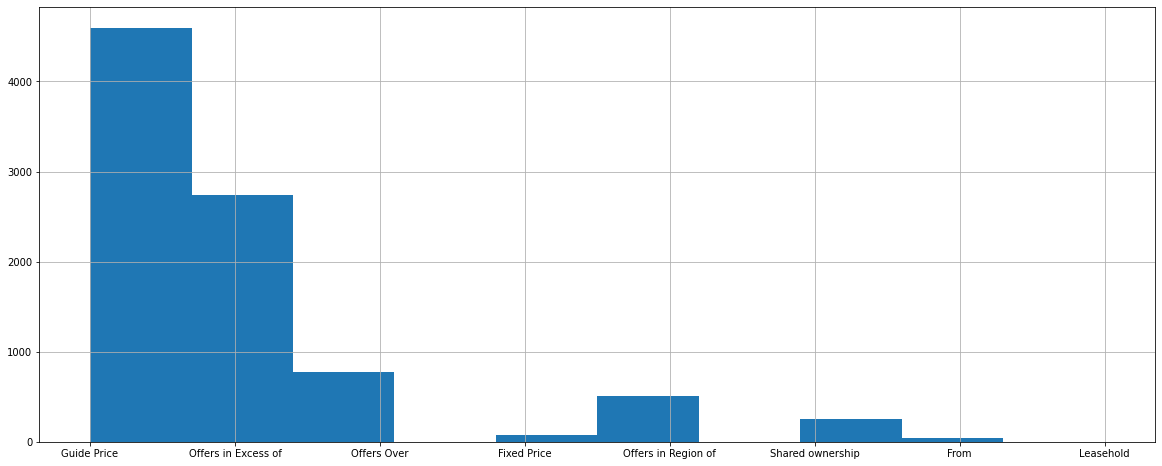

In [18]:
i = (i + 1) % len(columns)
next_histogram()

skipping prices.pricePerSqFt(2866)/prices.message(1)/prices.exchangeRate(1)/address.displayAddress(16536)/address.countryCode(2)/address.deliveryPointId(13177)/address.ukCountry(2)/address.outcode(237)/address.incode(3374)/location.latitude(17379)/location.longitude(18057)/location.circleRadiusOnMap(2)/location.zoomLevel(2): too many value types or not enough value types

66 location.pinType object 3


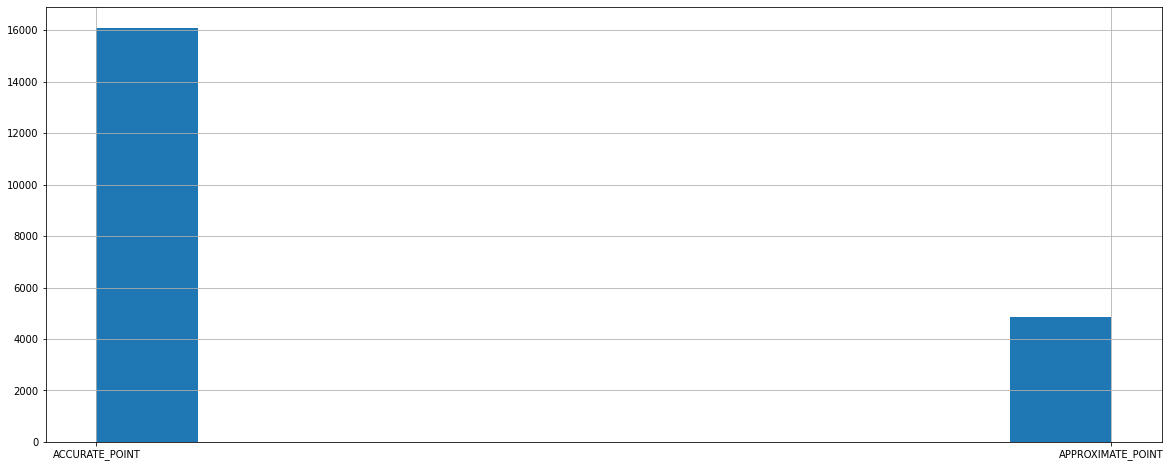

In [19]:
i = (i + 1) % len(columns)
next_histogram()

skipping location.showMap(2)/misInfo.branchId(2203): too many value types or not enough value types

69 misInfo.offerAdvertStampTypeId float64 28


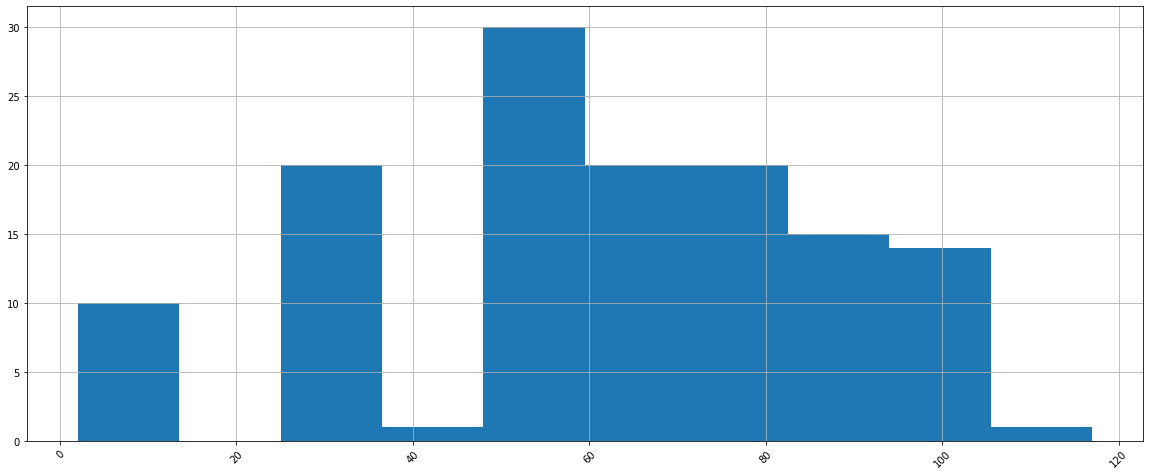

In [20]:
i = (i + 1) % len(columns)
next_histogram()

70 misInfo.premiumDisplay object 3
failed to load graph


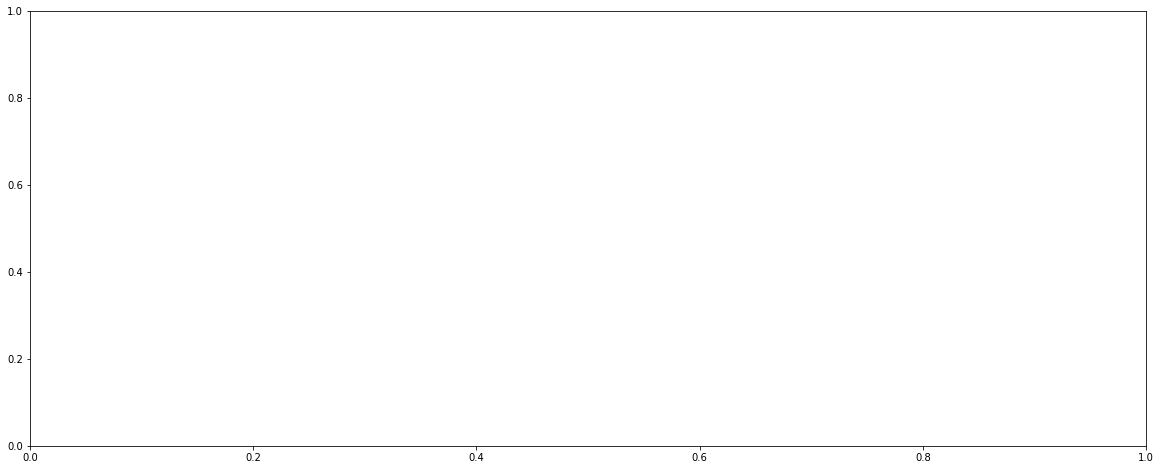

In [21]:
i = (i + 1) % len(columns)
next_histogram()

skipping misInfo.premiumDisplayStampId(89): too many value types or not enough value types

72 misInfo.brandPlus object 3
failed to load graph


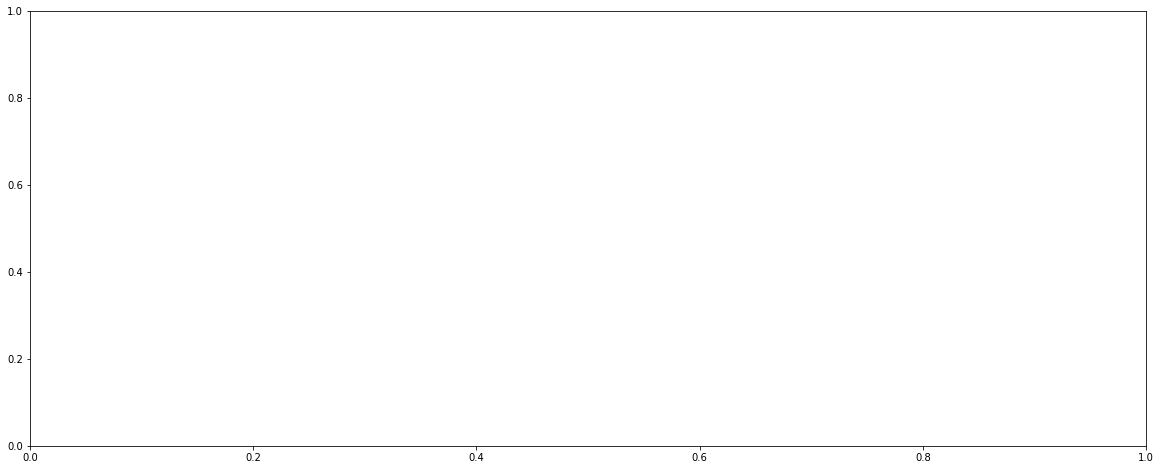

In [22]:
i = (i + 1) % len(columns)
next_histogram()

73 misInfo.featuredProperty object 3
failed to load graph


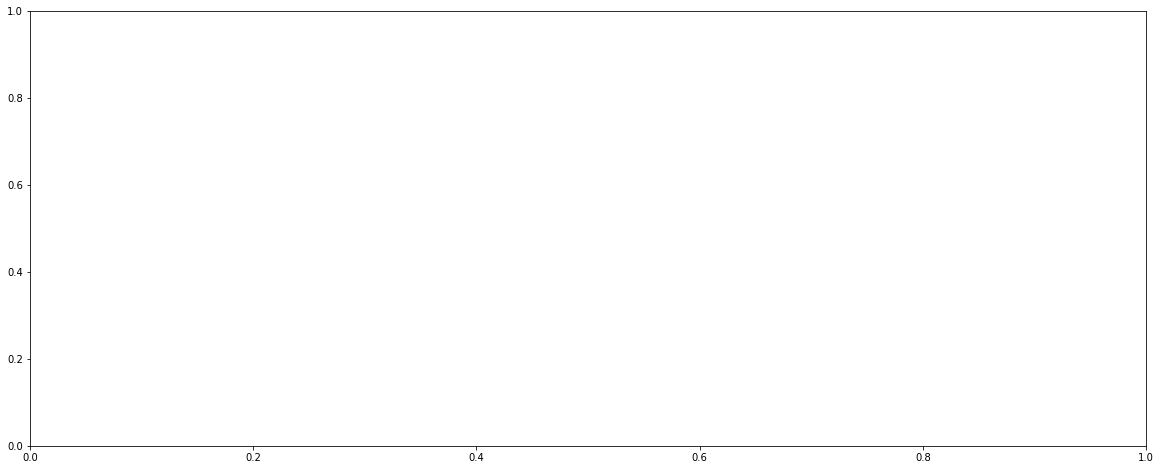

In [23]:
i = (i + 1) % len(columns)
next_histogram()

skipping listingHistory.listingUpdateReason(1088)/contactInfo.contactMethod(2)/contactInfo.telephoneNumbers.localNumber(2196)/contactInfo.telephoneNumbers.internationalNumber(1)/contactInfo.telephoneNumbers.disclaimerText(1)/contactInfo.telephoneNumbers.disclaimerTitle(1)/contactInfo.telephoneNumbers.disclaimerDescription(1): too many value types or not enough value types

81 tenure.tenureType object 5


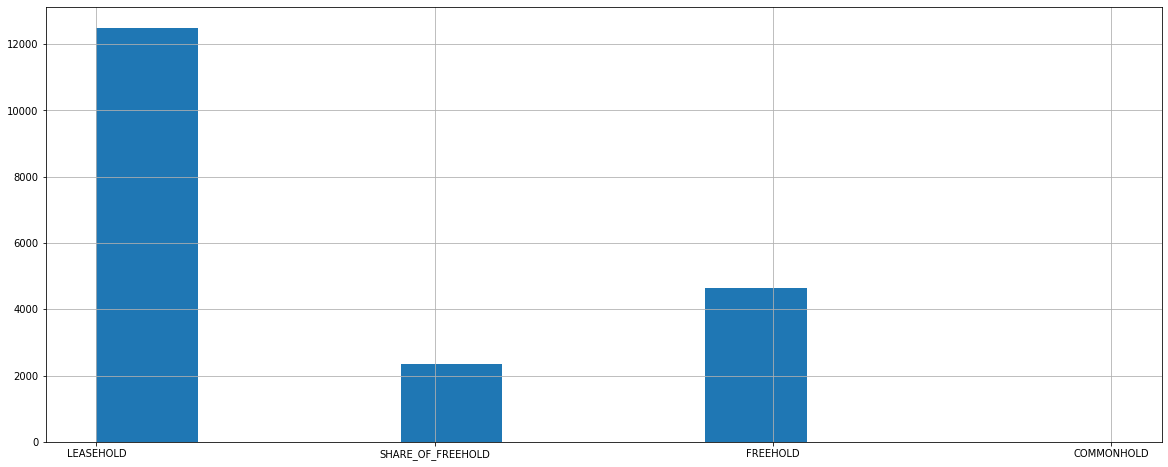

In [24]:
i = (i + 1) % len(columns)
next_histogram()

skipping tenure.yearsRemainingOnLease(204)/tenure.message(331): too many value types or not enough value types

84 sharedOwnership.sharedOwnership object 3
failed to load graph


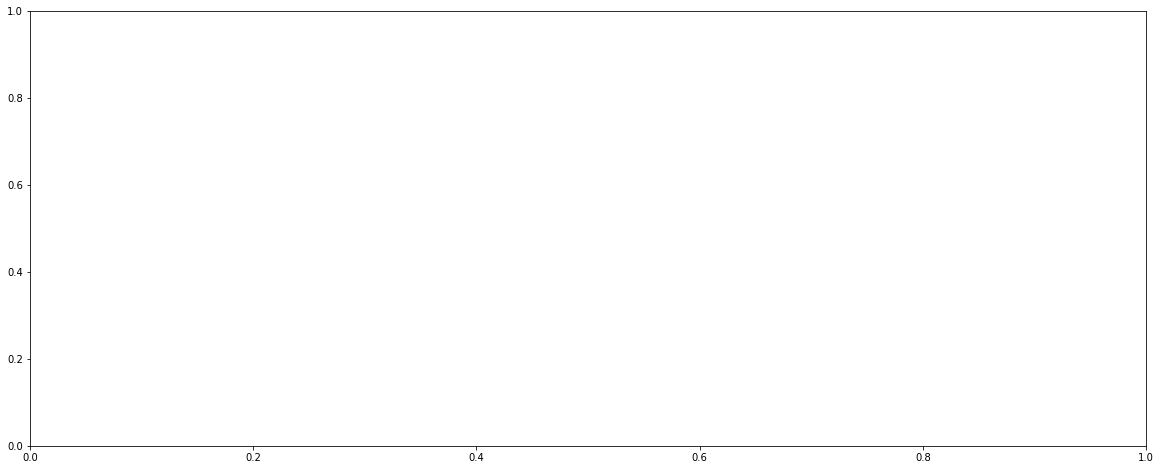

In [25]:
i = (i + 1) % len(columns)
next_histogram()

85 sharedOwnership.ownershipPercentage float64 6


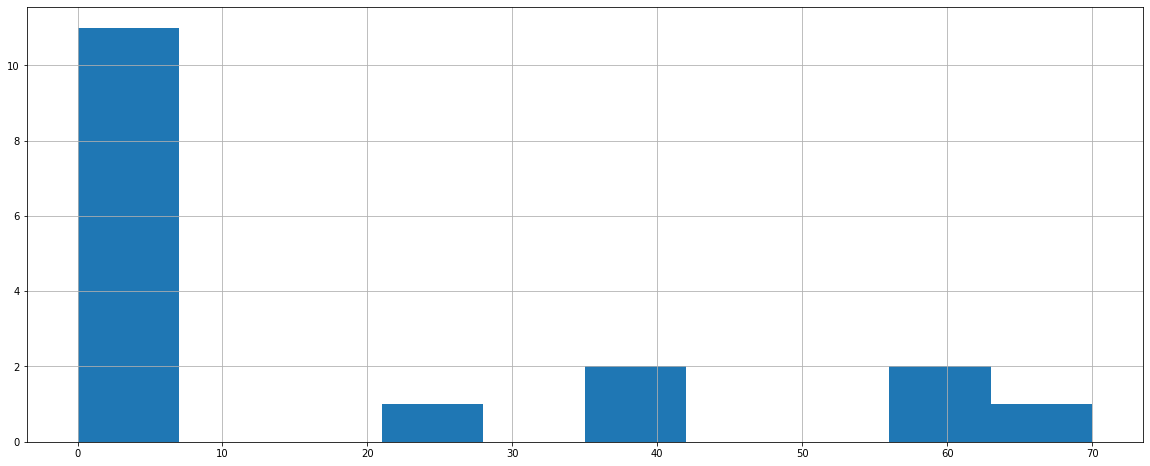

In [26]:
i = (i + 1) % len(columns)
next_histogram()

86 sharedOwnership.rentPrice float64 3


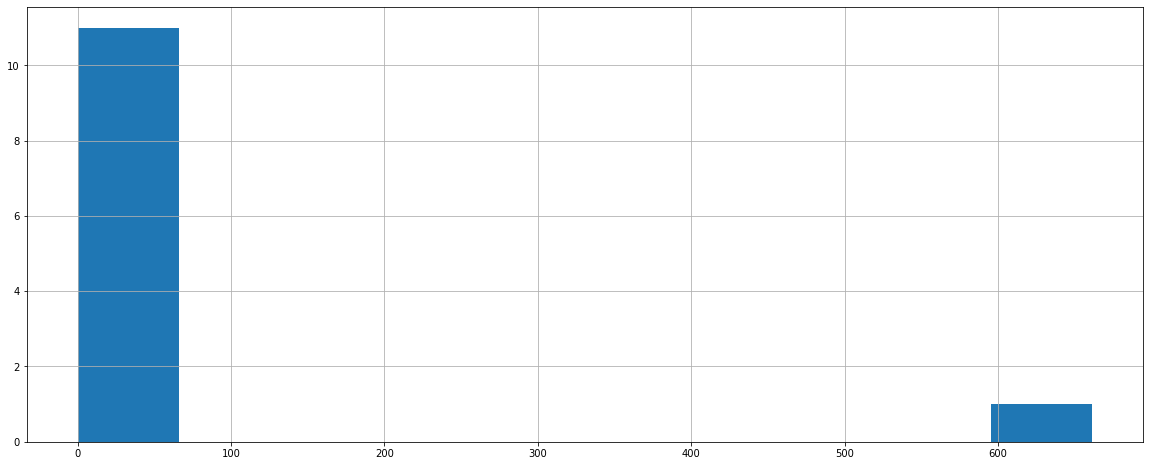

In [27]:
i = (i + 1) % len(columns)
next_histogram()

87 sharedOwnership.rentFrequency object 3


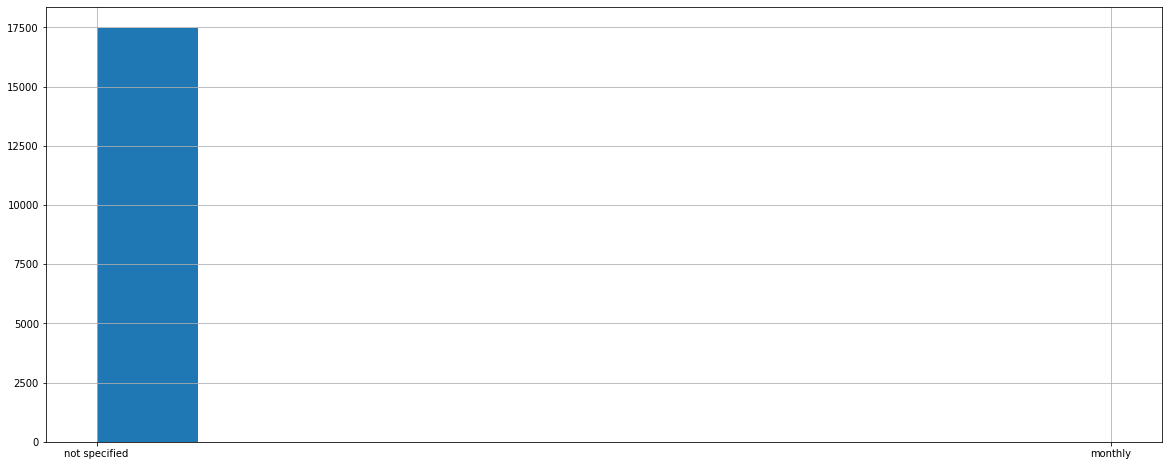

In [28]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.councilTaxExempt(2): too many value types or not enough value types

89 livingCosts.councilTaxIncluded object 3
failed to load graph


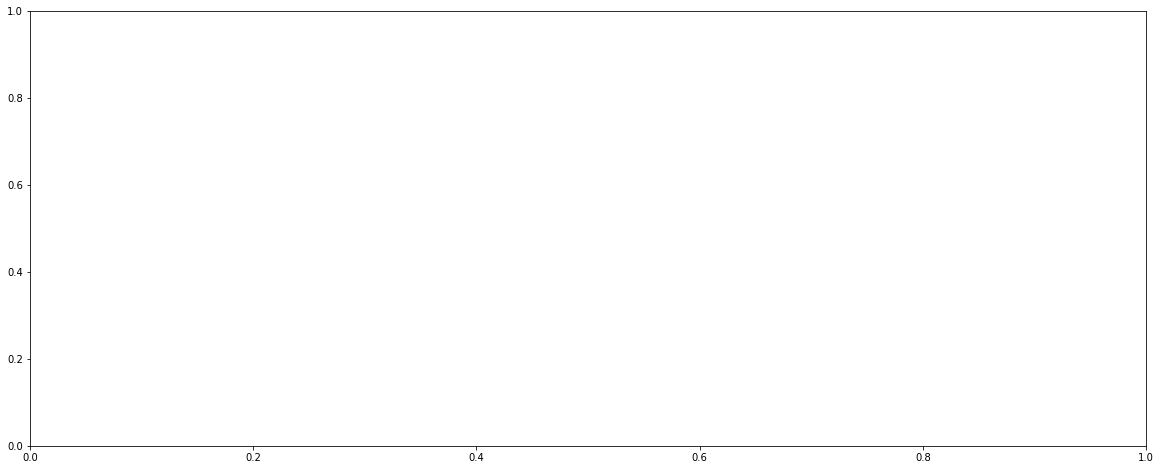

In [29]:
i = (i + 1) % len(columns)
next_histogram()

90 livingCosts.annualGroundRent float64 23


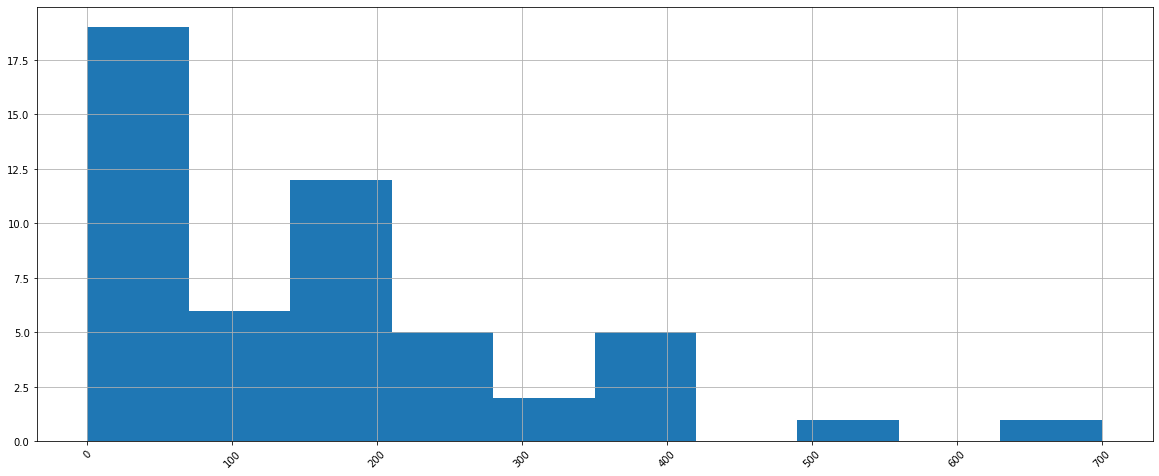

In [30]:
i = (i + 1) % len(columns)
next_histogram()

91 livingCosts.groundRentReviewPeriodInYears float64 5


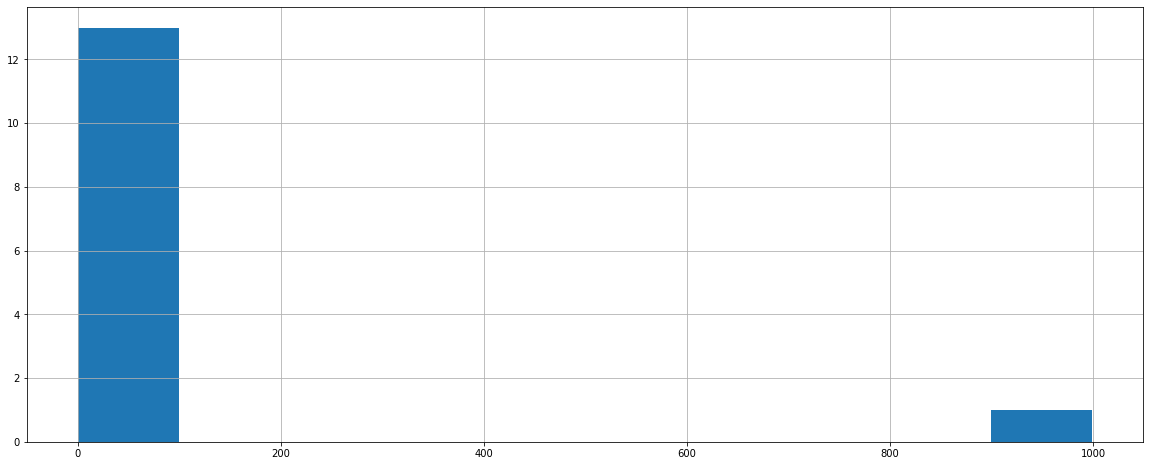

In [31]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.groundRentPercentageIncrease(2): too many value types or not enough value types

93 livingCosts.annualServiceCharge float64 47


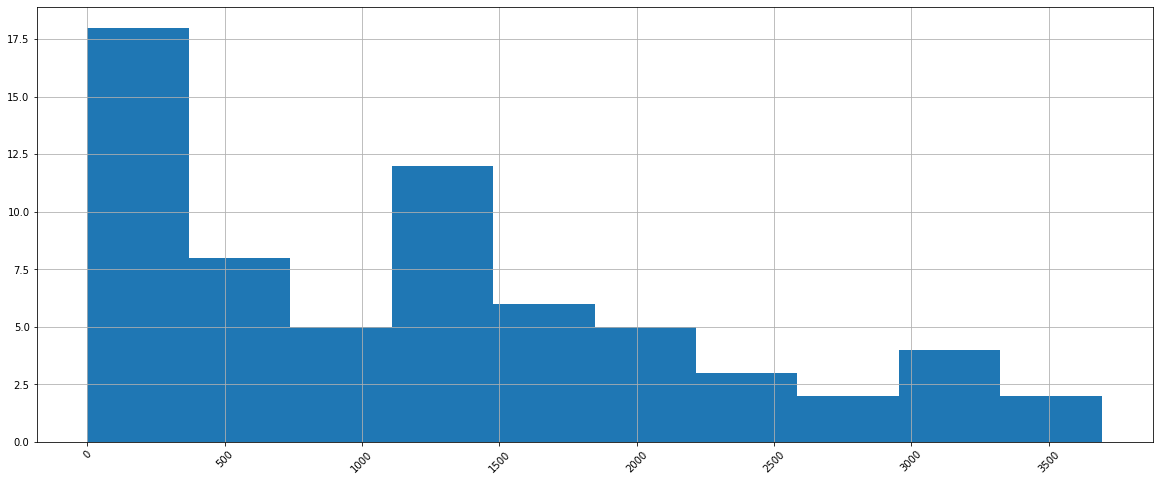

In [32]:
i = (i + 1) % len(columns)
next_histogram()

94 livingCosts.councilTaxBand object 10


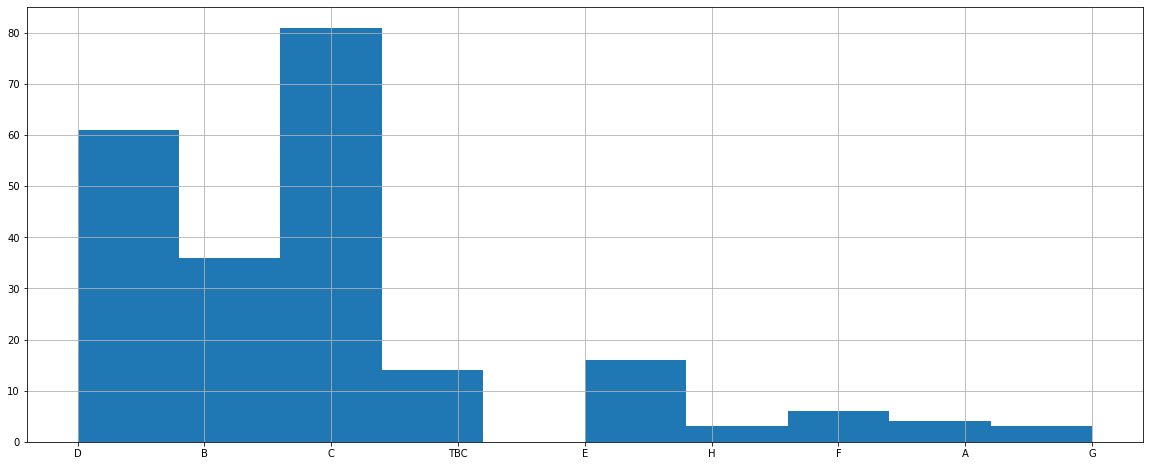

In [33]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.domesticRates(2)/dfpAdInfo.channel(2): too many value types or not enough value types

97 dfpAdInfo.targeting object 8


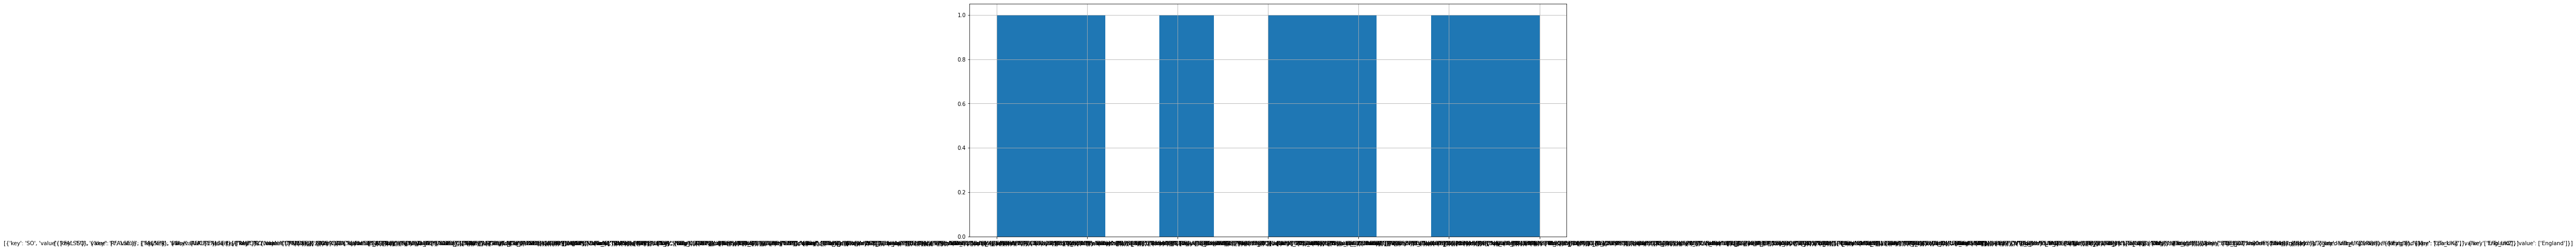

In [34]:
i = (i + 1) % len(columns)
next_histogram()

98 auctionProvider.endDate object 7


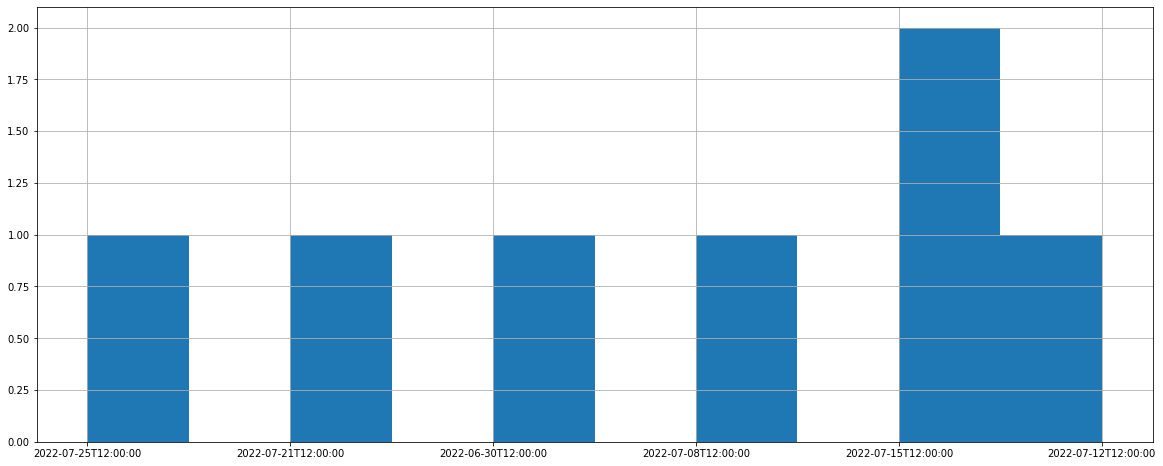

In [35]:
i = (i + 1) % len(columns)
next_histogram()

99 auctionProvider.auctionTimeRemaining object 8


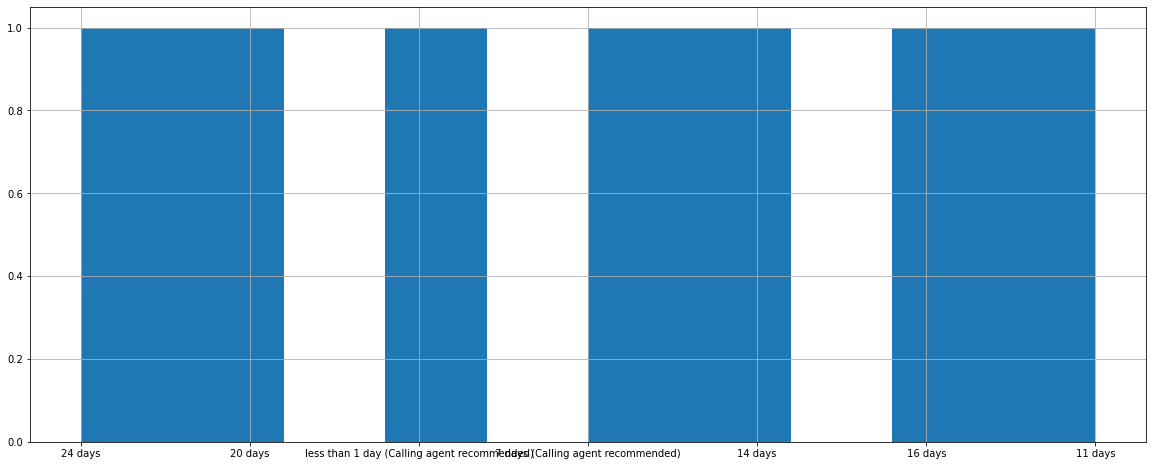

In [36]:
i = (i + 1) % len(columns)
next_histogram()

skipping auctionProvider.bid(1)/date_scraped_meta(20805): too many value types or not enough value types

102 analyticsBranch.agentType object 5


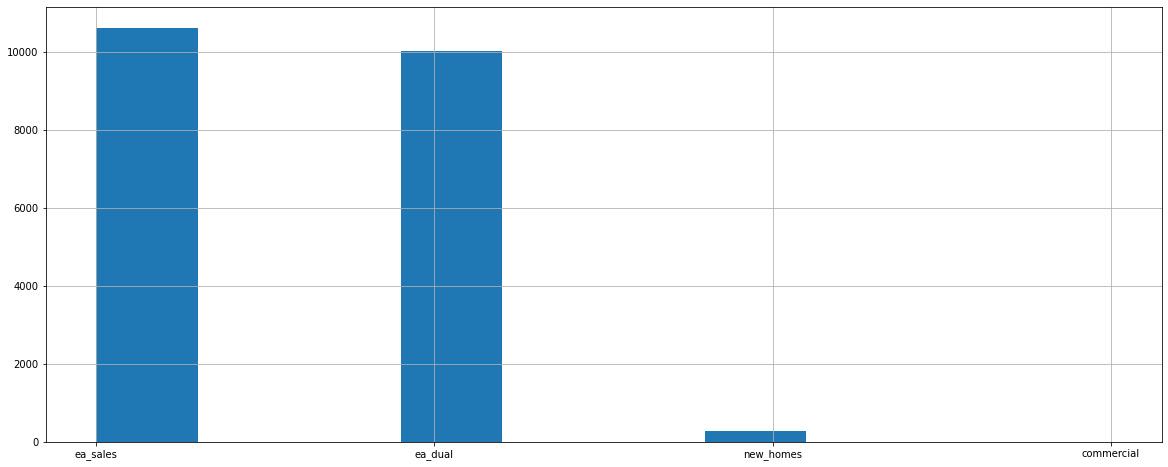

In [37]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsBranch.branchId(2203)/analyticsBranch.branchName(788)/analyticsBranch.branchPostcode(1)/analyticsBranch.brandName(1232)/analyticsBranch.companyName(1172)/analyticsBranch.companyTradingName(871): too many value types or not enough value types

109 analyticsBranch.companyType object 6


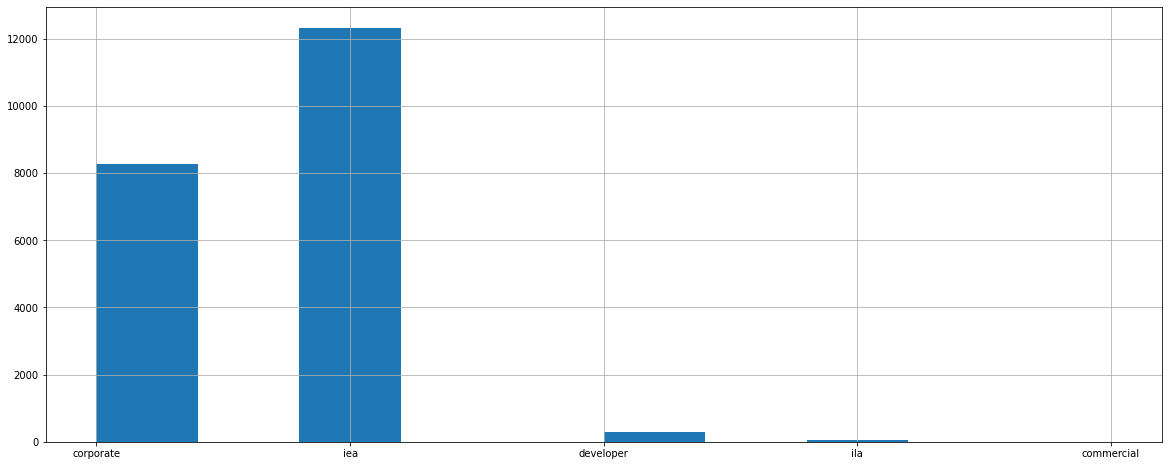

In [38]:
i = (i + 1) % len(columns)
next_histogram()

110 analyticsBranch.pageType object 3


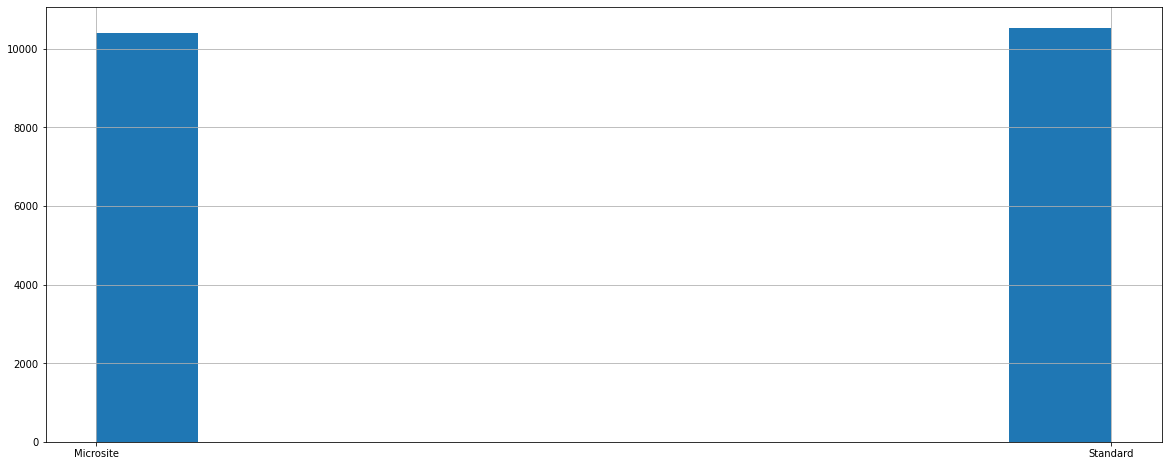

In [39]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.added(769): too many value types or not enough value types

112 analyticsProperty.auctionOnly object 3
failed to load graph


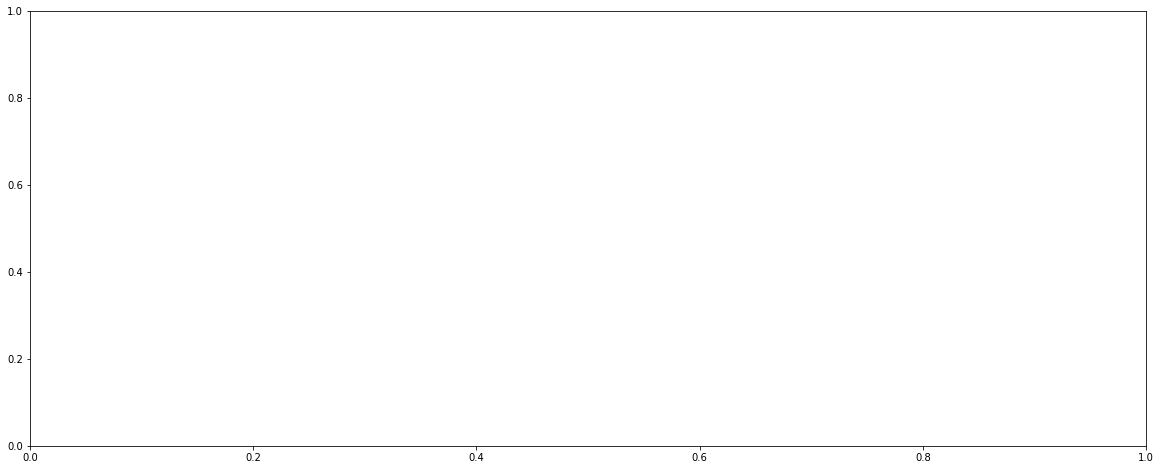

In [40]:
i = (i + 1) % len(columns)
next_histogram()

113 analyticsProperty.beds float64 11


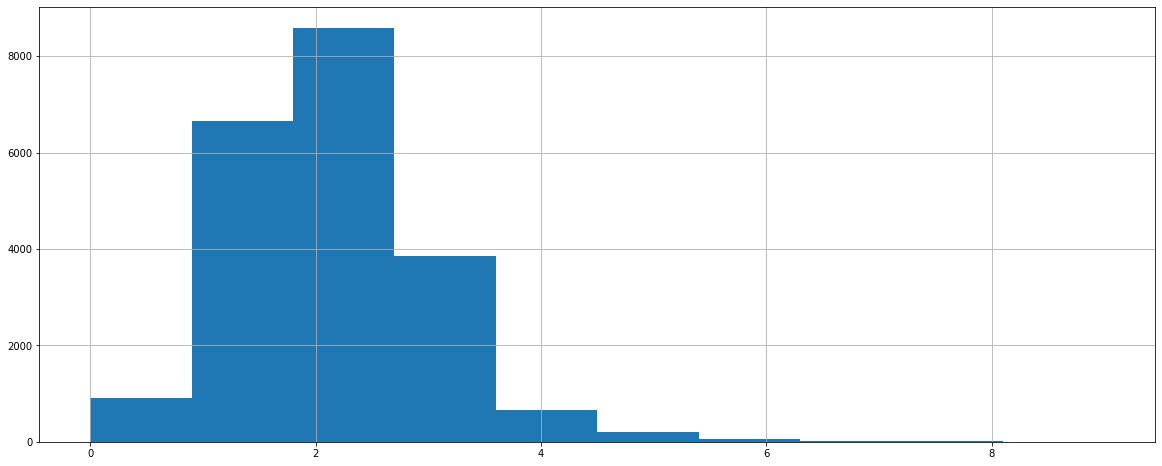

In [41]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.businessForSale(2)/analyticsProperty.country(2)/analyticsProperty.currency(2): too many value types or not enough value types

117 analyticsProperty.floorplanCount float64 10


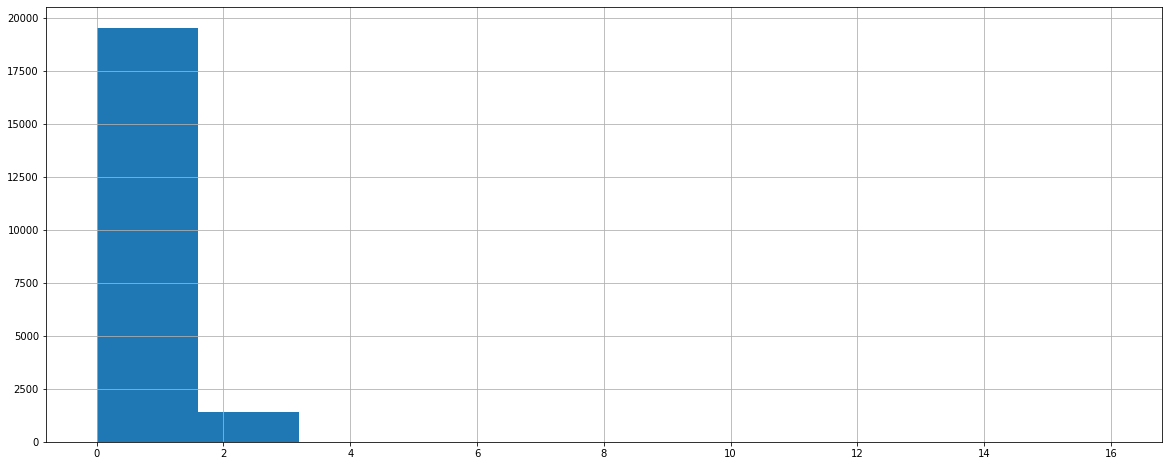

In [42]:
i = (i + 1) % len(columns)
next_histogram()

118 analyticsProperty.furnishedType object 6


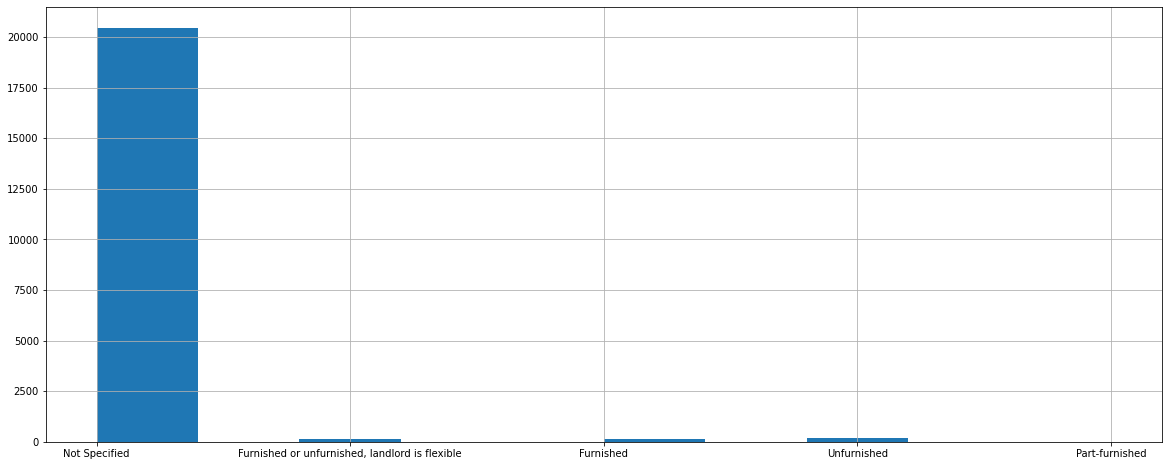

In [43]:
i = (i + 1) % len(columns)
next_histogram()

119 analyticsProperty.hasOnlineViewing object 3
failed to load graph


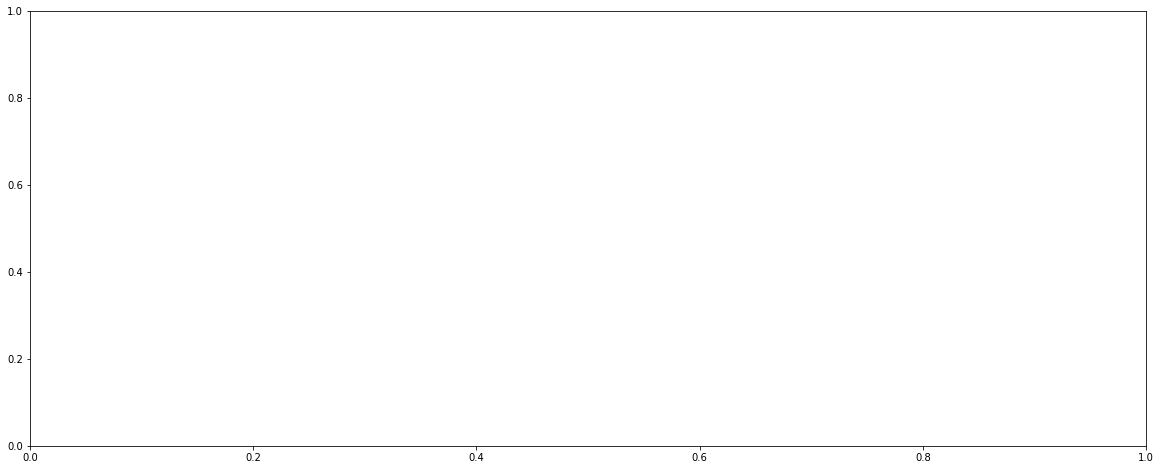

In [44]:
i = (i + 1) % len(columns)
next_histogram()

120 analyticsProperty.imageCount float64 49


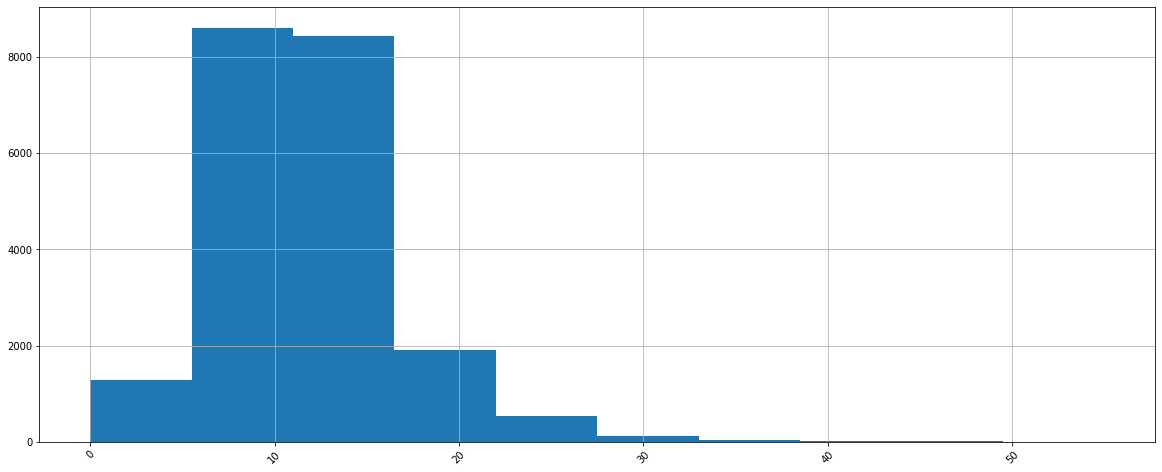

In [45]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.latitude(17383)/analyticsProperty.longitude(18061)/analyticsProperty.letAgreed(2)/analyticsProperty.lettingType(2)/analyticsProperty.maxSizeAc(1222)/analyticsProperty.maxSizeFt(1034)/analyticsProperty.minSizeAc(1219)/analyticsProperty.minSizeFt(1031): too many value types or not enough value types

129 analyticsProperty.ownership object 3


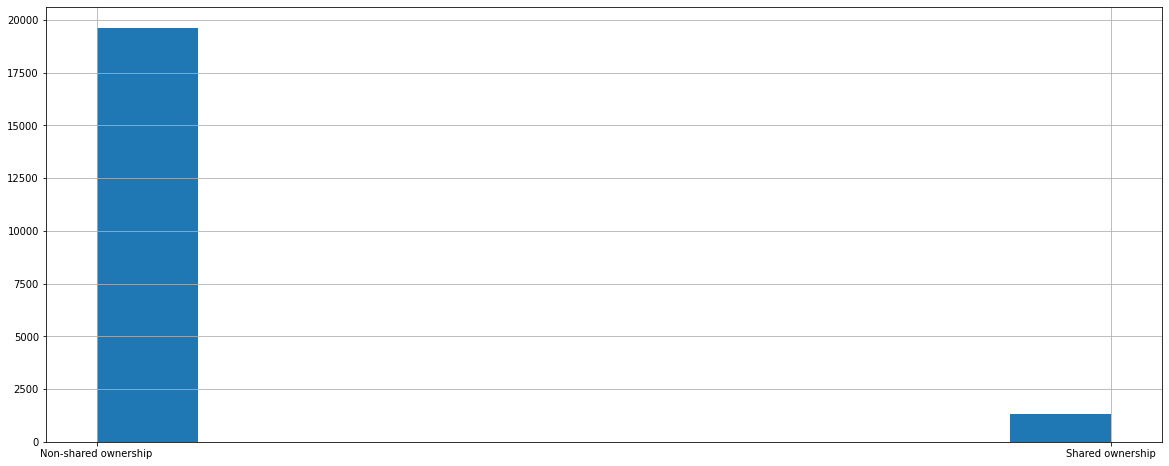

In [46]:
i = (i + 1) % len(columns)
next_histogram()

130 analyticsProperty.preOwned object 3


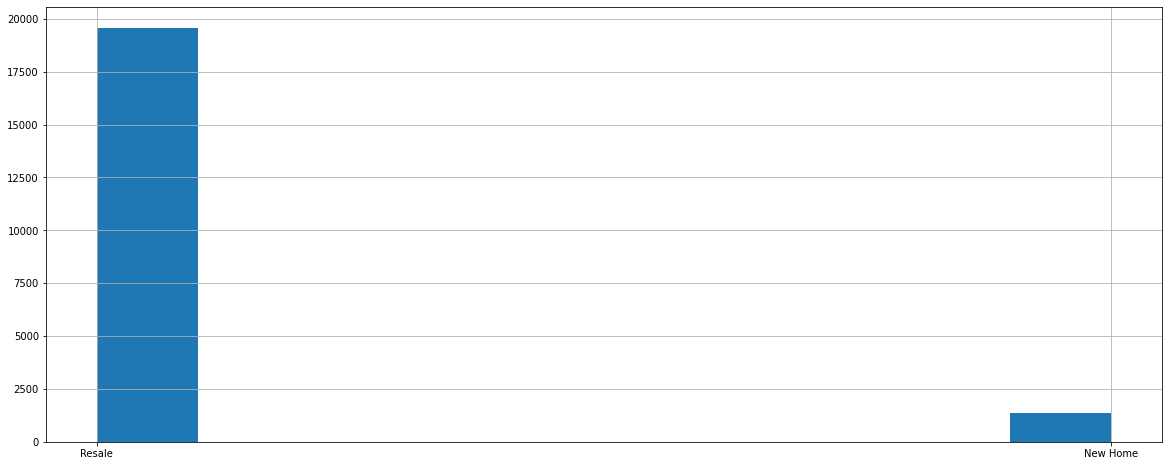

In [47]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.price(1083): too many value types or not enough value types

132 analyticsProperty.priceQualifier object 10


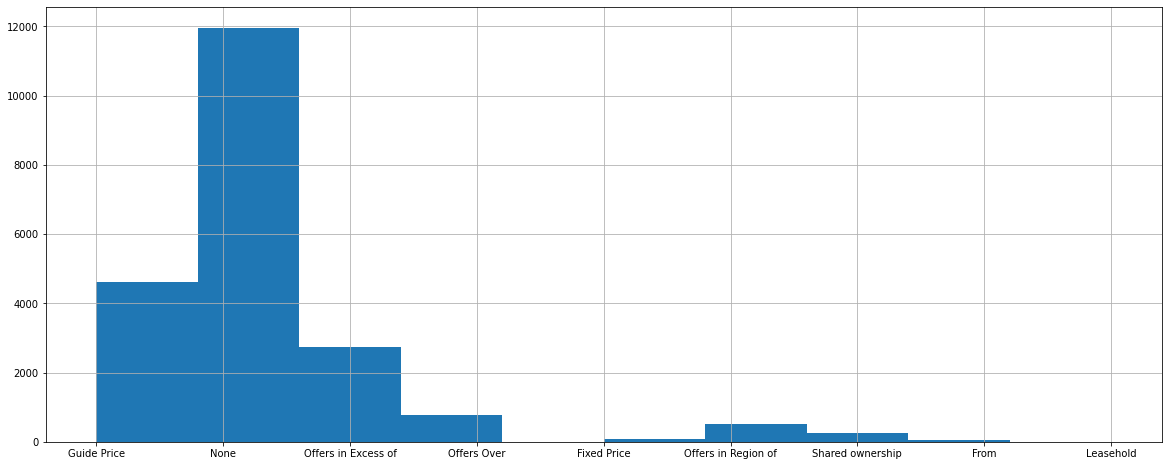

In [48]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.propertyId(20957): too many value types or not enough value types

134 analyticsProperty.propertySubType object 33


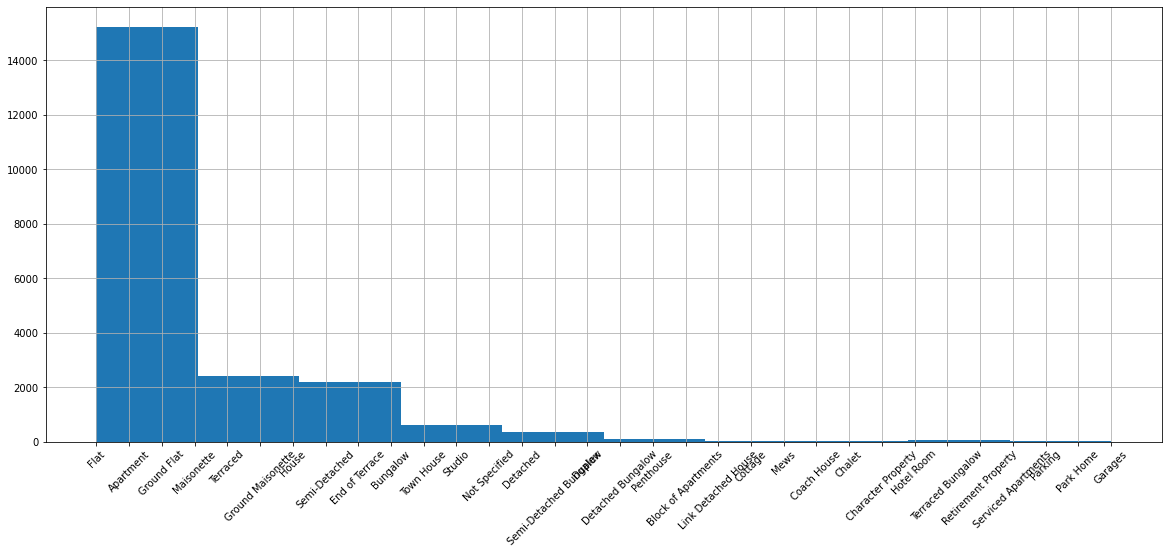

In [49]:
i = (i + 1) % len(columns)
next_histogram()

135 analyticsProperty.propertyType object 9


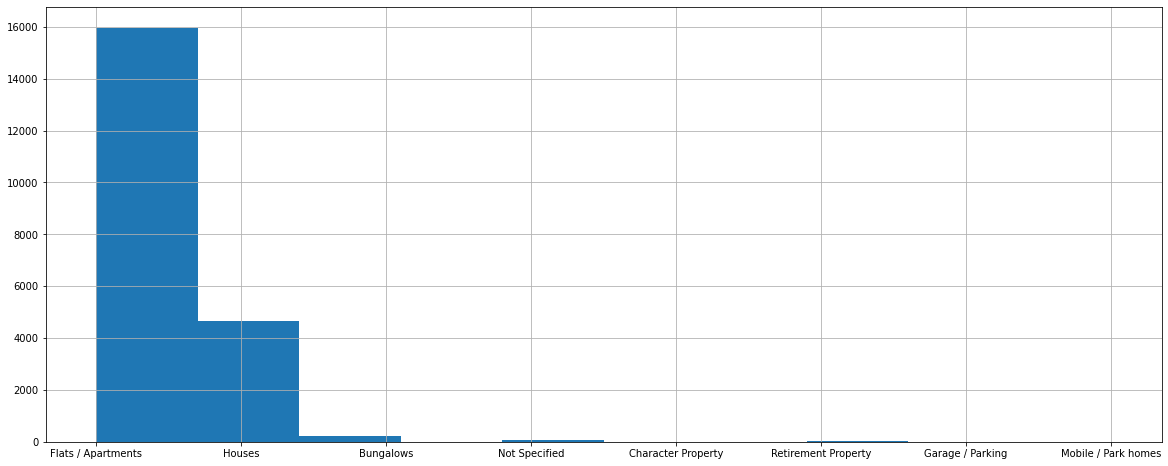

In [50]:
i = (i + 1) % len(columns)
next_histogram()

136 analyticsProperty.retirement object 3
failed to load graph


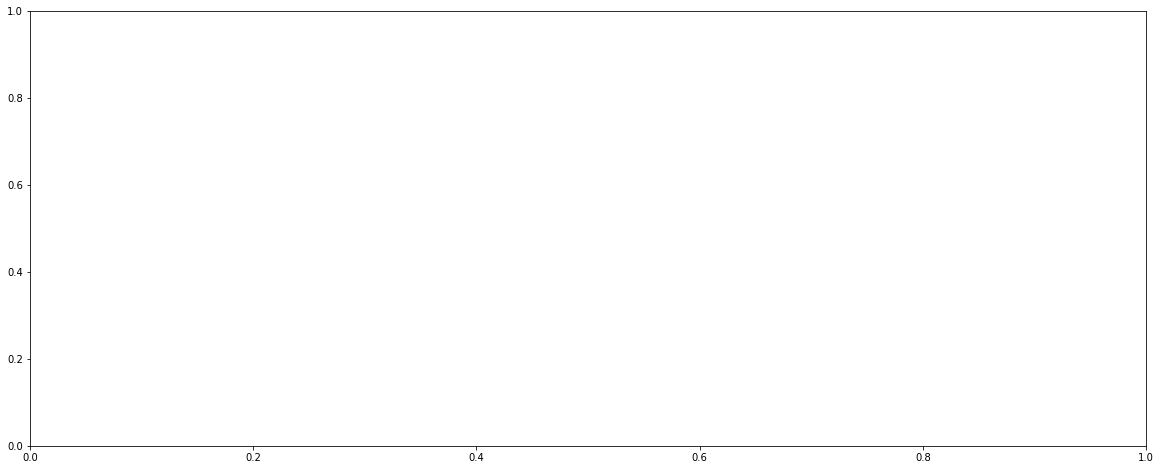

In [51]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.selectedCurrency(1)/analyticsProperty.selectedPrice(1): too many value types or not enough value types

139 analyticsProperty.soldSTC object 3
failed to load graph


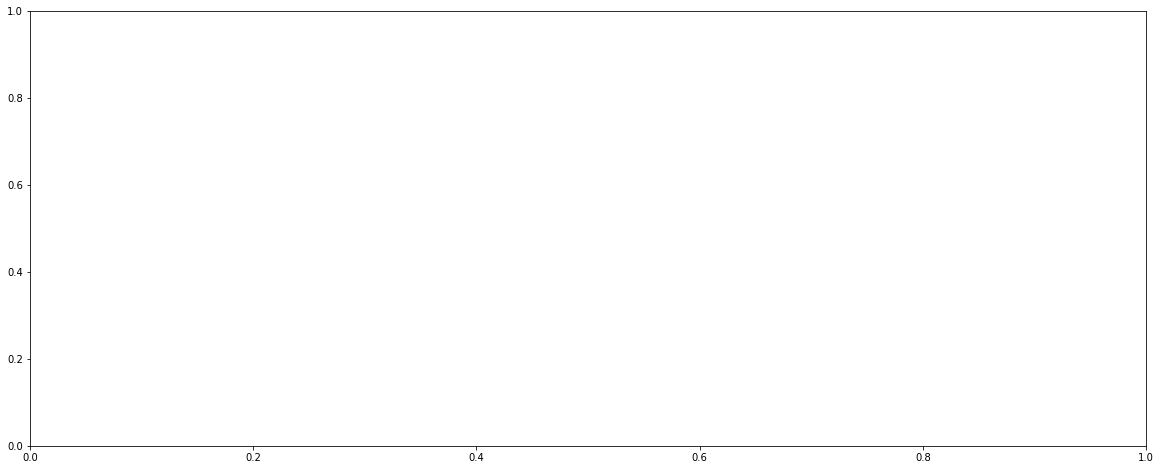

In [52]:
i = (i + 1) % len(columns)
next_histogram()

140 analyticsProperty.videoProvider object 4


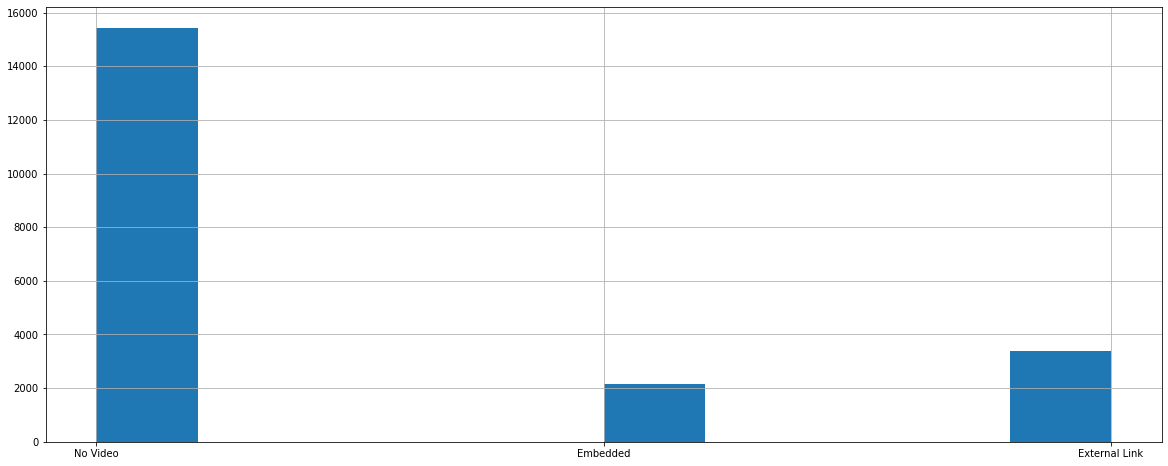

In [53]:
i = (i + 1) % len(columns)
next_histogram()

141 analyticsProperty.viewType object 3


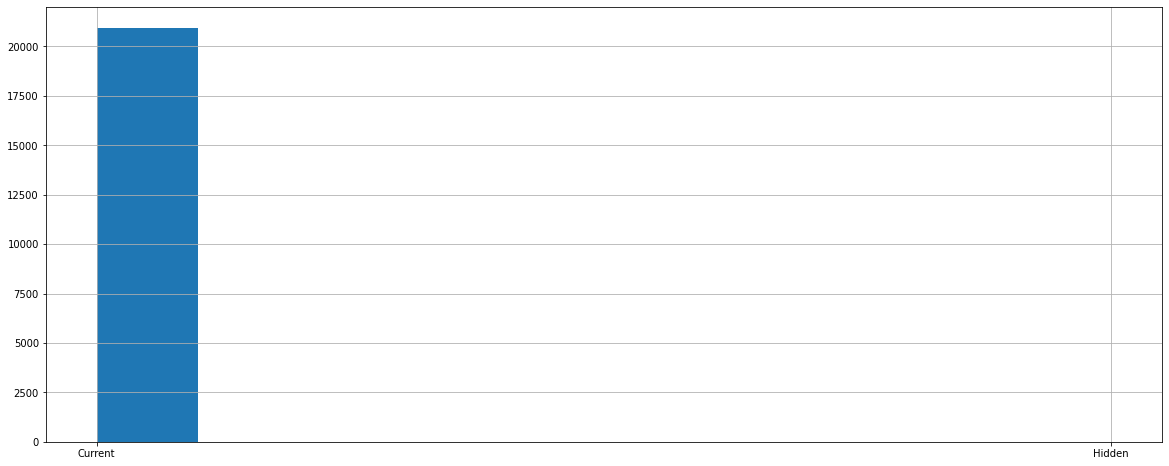

In [54]:
i = (i + 1) % len(columns)
next_histogram()

skipping Unnamed: 46(1): too many value types or not enough value types

143 borough_name object 26


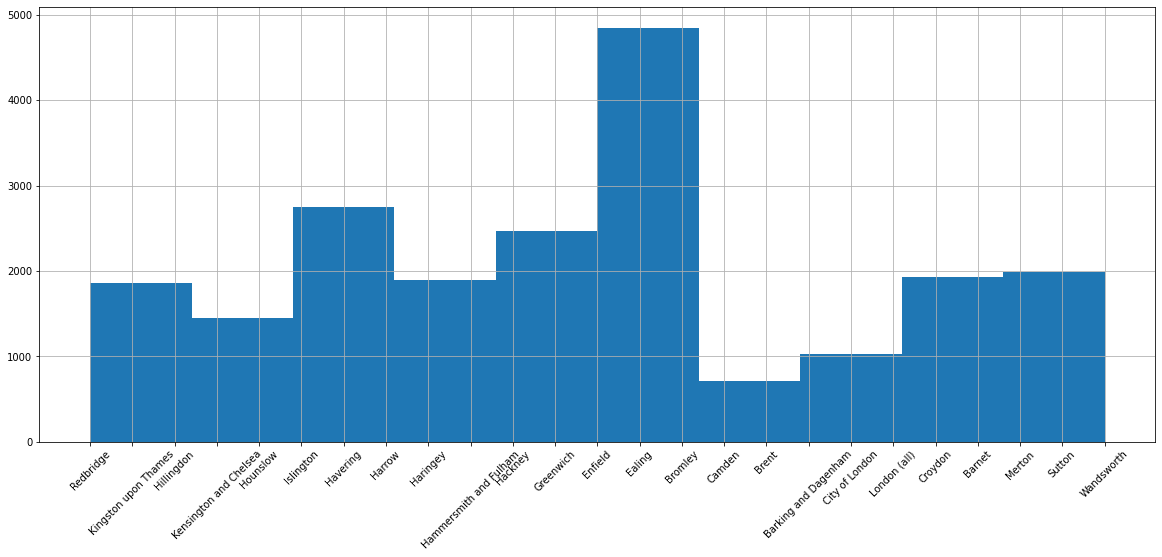

In [55]:
i = (i + 1) % len(columns)
next_histogram()

144 floorplan_count float64 17


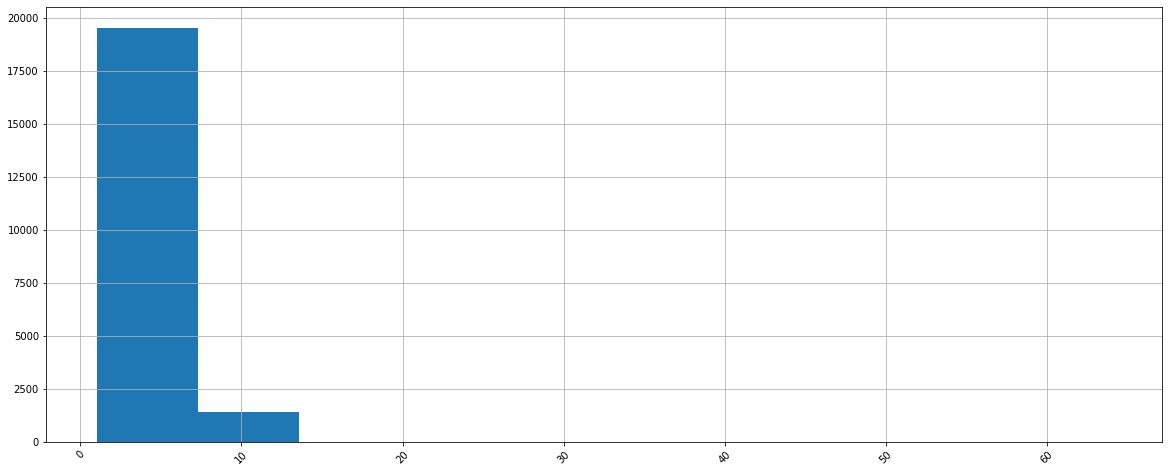

In [56]:
i = (i + 1) % len(columns)
next_histogram()

skipping Description(124)/Price(1082)/add_info(16745): too many value types or not enough value types

3 distance_to_any_train float64 43


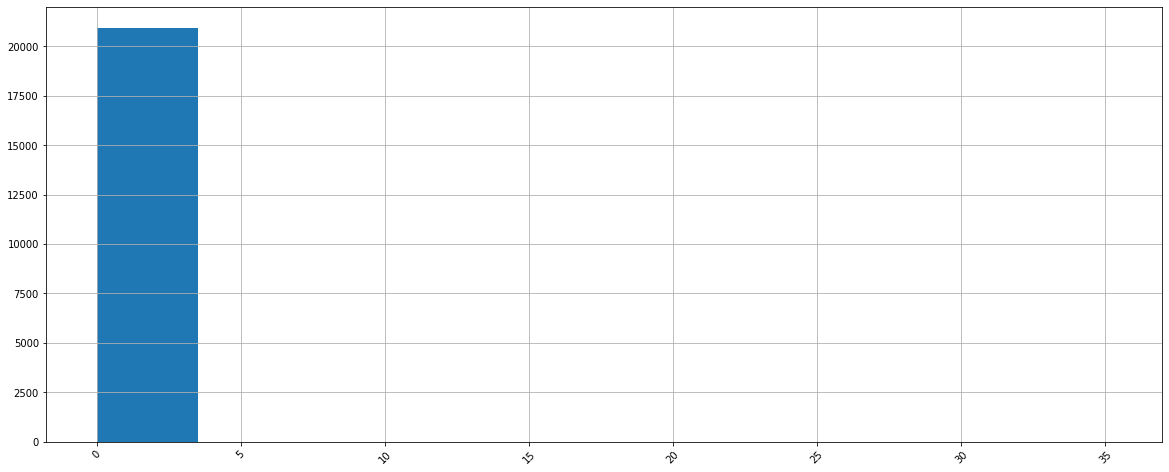

In [57]:
i = (i + 1) % len(columns)
next_histogram()